# Prediction
 Now we are goin to make a prediction of the sales for the sales in general
 

In [49]:
# keep columns of interest 
df_aux_2 = df_aux.copy()
df_aux_2 = df_aux_2[df_aux_2['cancelled']==0]
df_aux_2 = df_aux_2[df_aux_2['Country']!='United Kingdom']

#transform country column
df_aux_2['Country'] = df_aux_2['Country'].astype('category').cat.codes.astype('int32')

#remove columns that are not necessary. Remove year because the data is only for 2011 
df_aux_2 = df_aux_2.drop(columns=['StockCode', 'cancelled', 'Quantity'],axis=1)

#group by year and month and calculate the total sales per each month 
df_aux_2 = df_aux_2.groupby(['month','year']).sum() 

#create prev sales column - corresponding to previuos month's sales 
df_aux_2 = df_aux_2.sort_values(by=['month','year','Country']).reset_index()
df_aux_2['prev_sales'] = df_aux_2['sales'].shift(1)
df_aux_2.dropna(inplace=True)
expected_value = df_aux_2.tail(1)
df_aux_2.drop(expected_value.index, axis=0, inplace=True)
df_aux_2

,month,year,Country,sales,prev_sales
1,02,2011,26993,87232.78,120444.16
2,03,2011,33598,119630.05,87232.78
3,04,2011,23620,48968.65,119630.05
4,05,2011,32771,116852.12,48968.65
5,06,2011,37488,131674.42,116852.12
6,07,2011,38002,108475.12,131674.42
7,08,2011,47179,136633.82,108475.12
8,09,2011,46416,146676.64,136633.82
9,10,2011,66089,184960.76,146676.64
10,11,2011,57872,159427.49,184960.76


Score: 0.9225959965367216


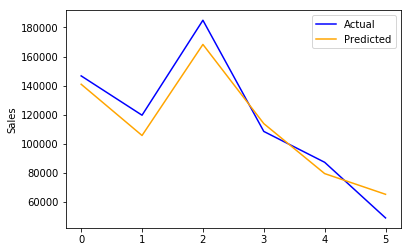

12    44312.86
Name: sales, dtype: float64 [86338.8996]


In [50]:
from sklearn import model_selection
from sklearn import linear_model

#split data into training and validation sets
X = df_aux_2.drop(['sales'], axis=1)
y = df_aux_2['sales']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.50, random_state=20)

#fit the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 100)
rf_model = rf_model.fit(X_test, y_test)

#make the predictions
predictions = rf_model.predict(X_test)
print('Score:',rf_model.score(X_test,y_test))
fig, ax = plt.subplots()

#plot actual vs predicted values 
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
ax.set_ylabel('Sales')
plt.show()



#predict sales for next month
x = expected_value.drop(['sales'], axis=1)
x = rf_model.predict(x)
print(expected_value['sales'], x)
#If we have had more data, the prediction would be more accurate 

In [ ]:
## Prediction
 Now we are goin to make a prediction of the sales for the sales in general
 

# keep columns of interest 
df_aux_2 = df_aux.copy()
df_aux_2 = df_aux_2[df_aux_2['cancelled']==0]
df_aux_2 = df_aux_2[df_aux_2['Country']!='United Kingdom']

#transform country column
df_aux_2['Country'] = df_aux_2['Country'].astype('category').cat.codes.astype('int32')

#remove columns that are not necessary. Remove year because the data is only for 2011 
df_aux_2 = df_aux_2.drop(columns=['StockCode', 'cancelled', 'Quantity'],axis=1)

#group by year and month and calculate the total sales per each month 
df_aux_2 = df_aux_2.groupby(['month','year']).sum() 

#create prev sales column - corresponding to previuos month's sales 
df_aux_2 = df_aux_2.sort_values(by=['month','year','Country']).reset_index()
df_aux_2['prev_sales'] = df_aux_2['sales'].shift(1)
df_aux_2.dropna(inplace=True)
expected_value = df_aux_2.tail(1)
df_aux_2.drop(expected_value.index, axis=0, inplace=True)
df_aux_2

from sklearn import model_selection
from sklearn import linear_model

#split data into training and validation sets
X = df_aux_2.drop(['sales'], axis=1)
y = df_aux_2['sales']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.50, random_state=20)

#fit the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 100)
rf_model = rf_model.fit(X_test, y_test)

#make the predictions
predictions = rf_model.predict(X_test)
print('Score:',rf_model.score(X_test,y_test))
fig, ax = plt.subplots()

#plot actual vs predicted values 
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
ax.set_ylabel('Sales')
plt.show()



#predict sales for next month
x = expected_value.drop(['sales'], axis=1)
x = rf_model.predict(x)
print(expected_value['sales'], x)
#If we have had more data, the prediction would be more accurate 